In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

94765736/94765736 [==============================] - 8s 0us/step


In [ ]:
len(base_model.layers)

175

In [ ]:
total_layers = len(base_model.layers)
total_layers

175

In [ ]:
porcentaje = .30
a = int(total_layers*porcentaje)
a

52

In [ ]:
layers_a_entrenar = total_layers - a
layers_a_entrenar

123

In [ ]:
for layer in base_model.layers[:layers_a_entrenar]:
    layer.trainable = False
for layer in base_model.layers[layers_a_entrenar:]:
    layer.trainable = True

In [ ]:
layers.Dense

keras.layers.core.dense.Dense

In [ ]:
Dense

keras.layers.core.dense.Dense

In [ ]:
models.Model

keras.engine.training.Model

In [ ]:
Model

keras.engine.training.Model

In [ ]:


# num_classes = 1
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation='relu')(x)

# predictions = layers.Dense(num_classes, activation='sigmoid')(x)
# # predictions = layers.Dense(2, activation='softmax')(x)

# model = models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from tensorflow.keras.layers import AveragePooling2D,  Flatten, Dropout
x = base_model.output
x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten(name="flatten")(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x) # antes era .5
predictions = Dense(1, activation="sigmoid")(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# ejemplo internet
# headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(256, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(len(config.CLASSES), activation="softmax")(headModel)

In [ ]:
# from tensorflow.keras.optimizers import AdamW

In [ ]:
# opt = Adam(learning_rate=INIT_LR)
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adadelta, AdamW
# from tensorflow.keras.optimizers import AdamW
# from keras_adamw import AdamW


opt = "Adamax"

In [ ]:
model.compile(optimizer= opt , loss='binary_crossentropy', metrics=['accuracy'],)

In [ ]:
len(model.layers)

180

In [ ]:
# esto quedo duplicado?
# # Agregar capaz de clasificacion choque / no choque
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# # x = layers.Dense(256, activation='relu')(x) XXXX probar agregar esta linea
# predictions = Dense(1, activation='sigmoid')(x)

# # Construyo el modelo final
# model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# base_learning_rate = 0.0001

In [ ]:
# INIT_LR = 1e-4
# BS = 32
# NUM_EPOCHS = 20

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Tesis_maestria_DS/Tesis/Proceso/2-Entrenamiento/1-Backbone/Datasets/Kaggle Dataset')

In [ ]:
base_dir = '/content/drive/MyDrive/Tesis_maestria_DS/Tesis/Proceso/2-Entrenamiento/1-Backbone/Datasets/Kaggle Dataset/'

train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rescale=1.0/255, # y este lo saque
    rotation_range=50,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    shear_range=0.3, # new
    zoom_range=0.3  # new
)


In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# val_datagen = ImageDataGenerator(preprocess_input)
# test_datagen = ImageDataGenerator(preprocess_input)

In [ ]:
batch_size = 32

In [ ]:
# batch_size = 32
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     batch_size= batch_size,
#     class_mode='binary'
# )


In [ ]:
target_size = (224, 224)
batch_size = 32
classes = ['Accident', 'Non Accident']

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=classes
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=classes
)

Found 791 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_generator.num_classes

2

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data = validation_generator)

Epoch 1/30
25/25 [==============================] - 126s 4s/step - loss: 0.8101 - accuracy: 0.6131 - val_loss: 1.3667 - val_accuracy: 0.6327
Epoch 2/30
25/25 [==============================] - 23s 885ms/step - loss: 0.5758 - accuracy: 0.7029 - val_loss: 12.0716 - val_accuracy: 0.4694
Epoch 3/30
25/25 [==============================] - 22s 907ms/step - loss: 0.5136 - accuracy: 0.7598 - val_loss: 19.4521 - val_accuracy: 0.4694
Epoch 4/30
25/25 [==============================] - 23s 889ms/step - loss: 0.4816 - accuracy: 0.7661 - val_loss: 2.1346 - val_accuracy: 0.6327
Epoch 5/30
25/25 [==============================] - 23s 917ms/step - loss: 0.4615 - accuracy: 0.7750 - val_loss: 0.6217 - val_accuracy: 0.8265
Epoch 6/30
25/25 [==============================] - 21s 850ms/step - loss: 0.4216 - accuracy: 0.7838 - val_loss: 1.2767 - val_accuracy: 0.7653
Epoch 7/30
25/25 [==============================] - 23s 901ms/step - loss: 0.4158 - accuracy: 0.7939 - val_loss: 0.3998 - val_accuracy: 0.8367

In [ ]:
# history = model.fit_generator(train_generator,
#                               epochs=10,
#                               steps_per_epoch = 791 // batch_size,
#                               validation_data = validation_generator,
#                               validation_steps = 100 // batch_size)

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt

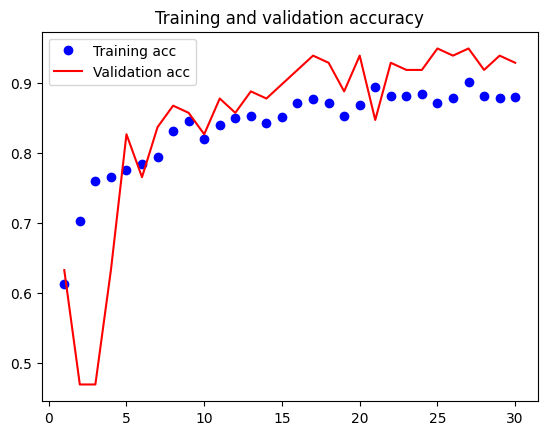

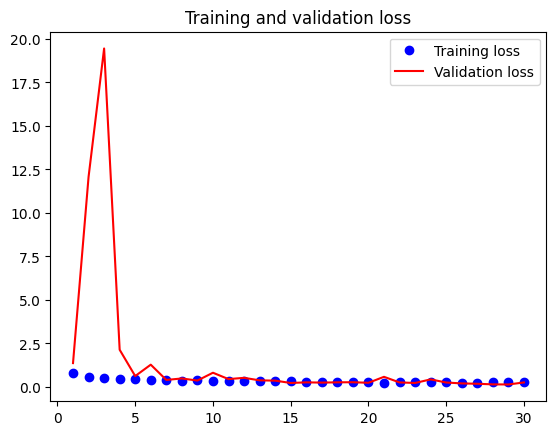

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
eval_results = model.evaluate(test_generator)
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])

4/4 [==============================] - 13s 4s/step - loss: 0.3871 - accuracy: 0.9300
Test Loss: 0.3870505392551422
Test Accuracy: 0.9300000071525574


In [ ]:
model.save('/content/drive/MyDrive/Tesis_maestria_DS/Tesis/Proceso/2-Entrenamiento/1-Backbone/ResNet50/resnet50_adamax_v1_kaggle.h5')